# 2008 and 2012 Election Predictions & Pollster analysis

This project is inspired and learned by matthew wilfred - a github user and data scientist.

This small project is first half of the whole project and this part is to see mainly two things :
1) How accurate are the pollsters in the US in general? Is it enough to predict correctly? Consider it with general population of 200 population for each pollster.
2) Which pollsters can we trust more and why and how are we going to incorporate that in to prediction. 

In this project, we are going to deal with the question 1, and the election data being used is 2008.
We have the data of 2008 Polls and Results - 2 csv data files.
We are simply going consider that each pollster on the data represents for 20 population.

1) Choose poll and election results from three different states.

3) For each state, calculate the posterior probability distribution; get probability of people voting for Obama based on the polls using a prior Beta distribution and the election results for a binomial likelihood function. Sources that helps understand.
https://en.wikipedia.org/wiki/Beta_distribution
https://onlinecourses.science.psu.edu/stat504/node/28
https://en.wikipedia.org/wiki/Posterior_probability

3) Plot the cumulative distribution function of the posterior probability.

In [351]:
from __future__ import division
import numpy as np
import pandas as pd
import math
from scipy.special import gamma as Gamma
from scipy.stats import beta
import matplotlib.pyplot as plt
%matplotlib inline

### Initialize Data. Poll data before election.

In [352]:
pre_polls = pd.read_csv('data/data_election/2008-polls.csv')
pre_polls.head(20)

,State,Dem,Rep,Date,Pollster
0,AK,33,64,Sep 09 2008,Rasmussen
1,AK,35,54,Sep 02 2008,IvanMooreResearch
2,AK,37,55,Sep 21 2008,FairleighDickinsonU
3,AK,38,55,Oct 06 2008,IvanMooreResearch
4,AK,39,44,Jul 30 2008,Rasmussen
5,AK,39,55,Sep 11 2008,ARG
6,AK,40,45,Jul 17 2008,Rasmussen
7,AK,40,55,Oct 06 2008,Rasmussen
8,AK,41,45,Jun 16 2008,Rasmussen
9,AK,41,50,May 14 2008,Rasmussen


In this case, Alaska has 13 pollsters. It will be then, 13 * 20 = 260 for the pool size, and the Dem and Rep will be the average. We trim the data table to show unique states.

In [353]:
pre_polls_size = pre_polls_state.size()
pre_polls_size = pd.DataFrame({'Size' : pre_polls.groupby(['State']).size()}).reset_index()
pre_polls_size.head()

,State,Size
0,AK,14
1,AL,23
2,AR,12
3,AZ,21
4,CA,30


In [354]:
pre_polls_statemean = pd.DataFrame(pre_polls.groupby(['State']).mean()).reset_index()
pre_polls_statemean.head()

,State,Dem,Rep
0,AK,39.428571,52.000000
1,AL,34.347826,56.826087
2,AR,37.250000,51.000000
3,AZ,39.190476,49.333333
4,CA,53.266667,37.633333


In [355]:
pre_polls_1 = pd.merge(pre_polls_size, pre_polls_statemean, on="State")
pre_polls_1.head()

,State,Size,Dem,Rep
0,AK,14,39.428571,52.000000
1,AL,23,34.347826,56.826087
2,AR,12,37.250000,51.000000
3,AZ,21,39.190476,49.333333
4,CA,30,53.266667,37.633333


In [356]:
pre_polls_1['Size'] = pre_polls_1['Size']*20
pre_polls_1.head()

,State,Size,Dem,Rep
0,AK,280,39.428571,52.000000
1,AL,460,34.347826,56.826087
2,AR,240,37.250000,51.000000
3,AZ,420,39.190476,49.333333
4,CA,600,53.266667,37.633333


In [357]:
pre_polls_1['Pro_Obama'] = np.divide(pre_polls_1['Dem'],np.add(pre_polls_1['Dem'],pre_polls_1['Rep']))
pre_polls_1['Poll_size'] = np.multiply(pre_polls_1['Size'], np.divide(np.add(pre_polls_1['Dem'],pre_polls_1['Rep']), 100))
pre_polls_1.head()

,State,Size,Dem,Rep,Pro_Obama,Poll_size
0,AK,280,39.428571,52.000000,0.431250,256.0
1,AL,460,34.347826,56.826087,0.376729,419.4
2,AR,240,37.250000,51.000000,0.422096,211.8
3,AZ,420,39.190476,49.333333,0.442711,371.8
4,CA,600,53.266667,37.633333,0.585992,545.4


In [358]:
del pre_polls_1['Dem']
del pre_polls_1['Rep']
pre_polls_1.head()

,State,Size,Pro_Obama,Poll_size
0,AK,280,0.431250,256.0
1,AL,460,0.376729,419.4
2,AR,240,0.422096,211.8
3,AZ,420,0.442711,371.8
4,CA,600,0.585992,545.4


### Election results data

In [359]:
results = pd.read_csv('data/data_election/2008-results.csv')
results.head()
results['Pro_Obama_Elected'] = np.divide(results['Dem'], np.add(results['Dem'],results['Rep']))
results['Size'] = pre_polls_1['Size']
results['Results_size'] = np.multiply(results['Size'], np.divide(np.add(results['Dem'],results['Rep']), 100))
results.head()

,State,Dem,Rep,Pro_Obama_Elected,Size,Results_size
0,AK,37.9,59.4,0.389517,280,272.44
1,AL,38.7,60.3,0.390909,460,455.40
2,AR,38.9,58.7,0.398566,240,234.24
3,AZ,45.1,53.6,0.456940,420,414.54
4,CA,61.0,37.0,0.622449,600,588.00


In [360]:
del results['Dem']
del results['Rep']
del results['Size']
results.head()

,State,Pro_Obama_Elected,Results_size
0,AK,0.389517,272.44
1,AL,0.390909,455.40
2,AR,0.398566,234.24
3,AZ,0.456940,414.54
4,CA,0.622449,588.00


In [361]:
data_dictionary = pd.merge(pre_polls_1, results, on="State")
data_dictionary.head()

,State,Size,Pro_Obama,Poll_size,Pro_Obama_Elected,Results_size
0,AK,280,0.431250,256.0,0.389517,272.44
1,AL,460,0.376729,419.4,0.390909,455.40
2,AR,240,0.422096,211.8,0.398566,234.24
3,AZ,420,0.442711,371.8,0.456940,414.54
4,CA,600,0.585992,545.4,0.622449,588.00


In [362]:
data_dictionary['stnum'] = list(range(1,52))
data_dictionary.head()

,State,Size,Pro_Obama,Poll_size,Pro_Obama_Elected,Results_size,stnum
0,AK,280,0.431250,256.0,0.389517,272.44,1
1,AL,460,0.376729,419.4,0.390909,455.40,2
2,AR,240,0.422096,211.8,0.398566,234.24,3
3,AZ,420,0.442711,371.8,0.456940,414.54,4
4,CA,600,0.585992,545.4,0.622449,588.00,5


In [363]:
data_dictionary = data_dictionary[['stnum', 'State', 'Pro_Obama_Elected', 'Size', 'Pro_Obama', 'Results_size', 'Poll_size']]
data_dictionary.head()

,stnum,State,Pro_Obama_Elected,Size,Pro_Obama,Results_size,Poll_size
0,1,AK,0.389517,280,0.431250,272.44,256.0
1,2,AL,0.390909,460,0.376729,455.40,419.4
2,3,AR,0.398566,240,0.422096,234.24,211.8
3,4,AZ,0.456940,420,0.442711,414.54,371.8
4,5,CA,0.622449,600,0.585992,588.00,545.4


In [364]:
list_post = []
for s in data_dictionary["stnum"]:
    data = (data_dictionary[data_dictionary["stnum"] == s])
    state = data.values[0,1]
    n = data.values[0,3]
    k = data.values[0,5]
    alpha_p = data.values[0,6]
    beta_p = n-alpha_p
    a = k + alpha_p
    b = n - k + beta_p
    list_post.append((state,a,b,alpha_p,beta_p))

In [365]:
def func_plot_1(values,my_list):
    i = 0
    for post in my_list:
        list_prob = []
        list_prob_1 = []
        for n in range(100):
            list_prob.append(beta.cdf(0.01*(n+1),post[1],post[2])
                     -beta.cdf(0.01*n,post[1],post[2]))
            list_prob_1.append(beta.cdf(0.01*(n+1),post[3],post[4])
                     -beta.cdf(0.01*n,post[3],post[4]))

        plt.plot(values,list_prob,'-',color=colors[i%8],linewidth=3,label=post[0])
        plt.plot(values,list_prob_1,'--',color=colors[i%8],linewidth=3)
        plt.legend(loc='upper left',fontsize=20)
        plt.xlabel('Percentage Pro Obama',fontsize=20)
        plt.ylabel('Posterior Probability',fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        i += 1

### Posterior Probablities

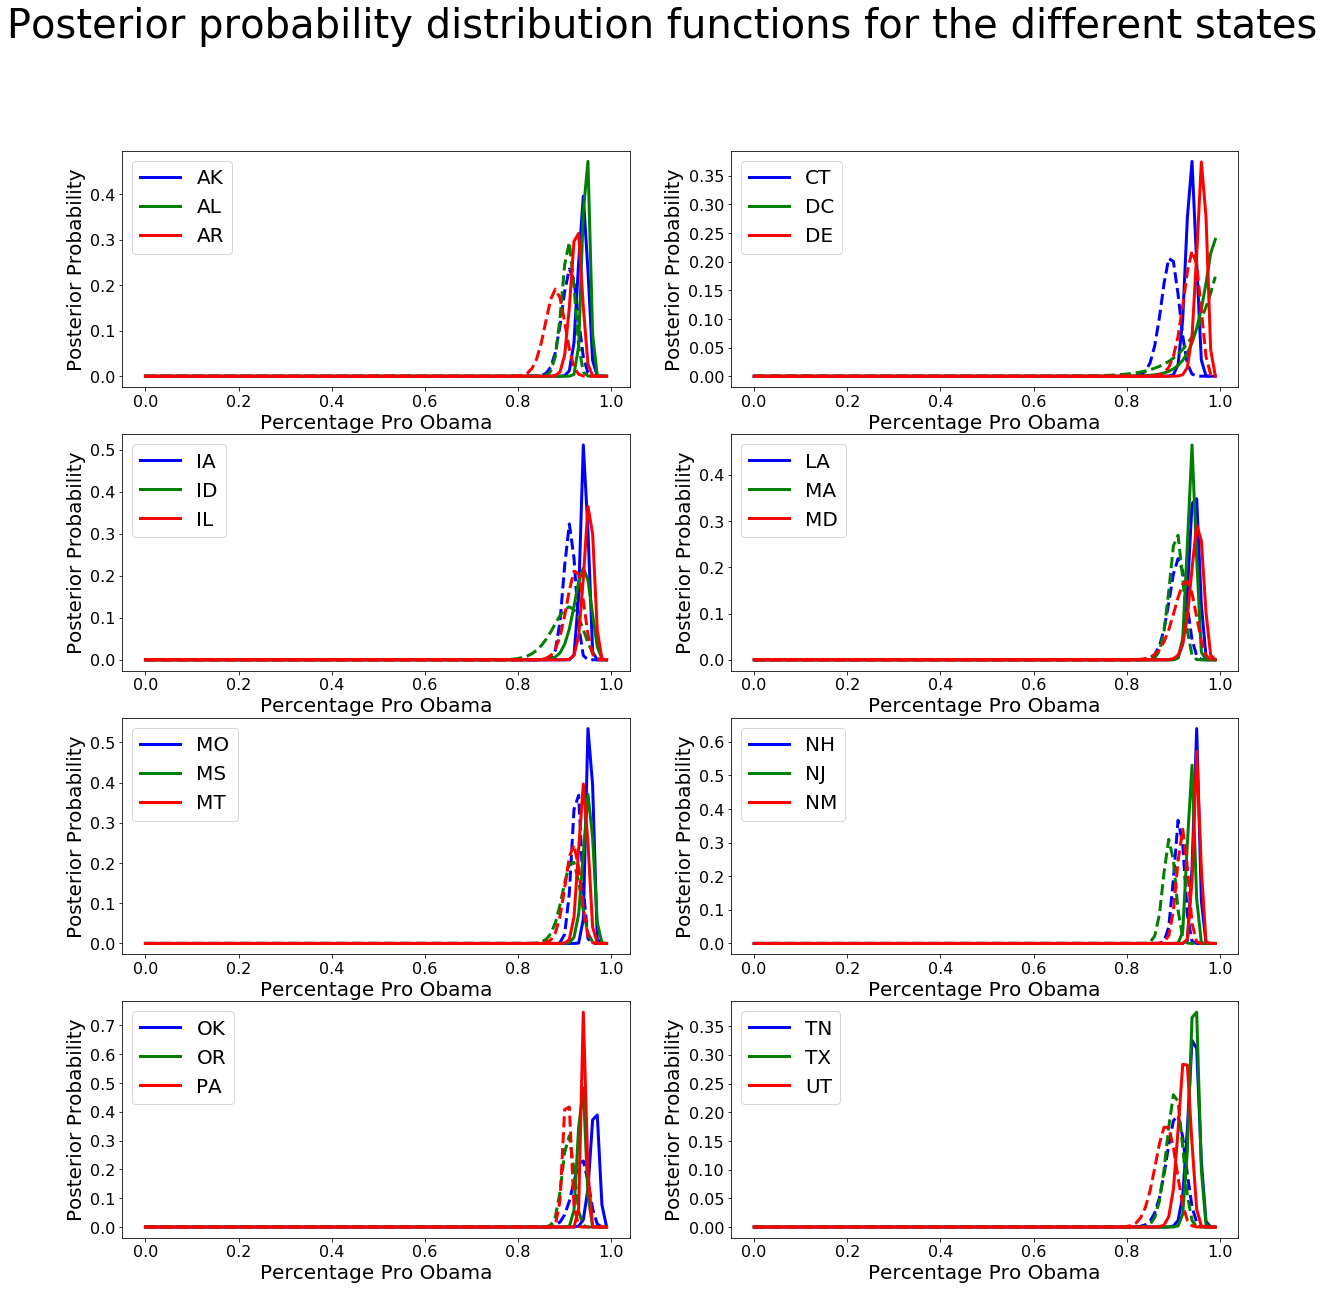

In [371]:
colors = ('b', 'g', 'r')

plt.figure(figsize=(20,20))
plt.suptitle('Posterior probability distribution functions for the different states', 
             fontsize=40)
values = np.arange(0,1,0.01)
j = np.array([0,3])
for i in range(8):
    j1 = j + i*6
    plt.subplot(4, 2, i+1)
    func_plot_1(values,list_post[j1[0]:j1[1]])
    
plt.show()

### Cumulative Distribution

In [368]:
def func_plot(values,my_list):
    i = 0
    for post in my_list:
        plt.plot(values,beta.cdf(values,post[1],post[2]),'-',color=colors[i%8],linewidth=3,label=post[0])
        plt.plot(values,beta.cdf(values,post[3],post[4]),'--',color=colors[i%8],linewidth=3)
        plt.legend(loc='upper left',fontsize=20)
        plt.xlabel('x',fontsize=20)
        plt.ylabel('P(theta <x)',fontsize=20)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        i += 1

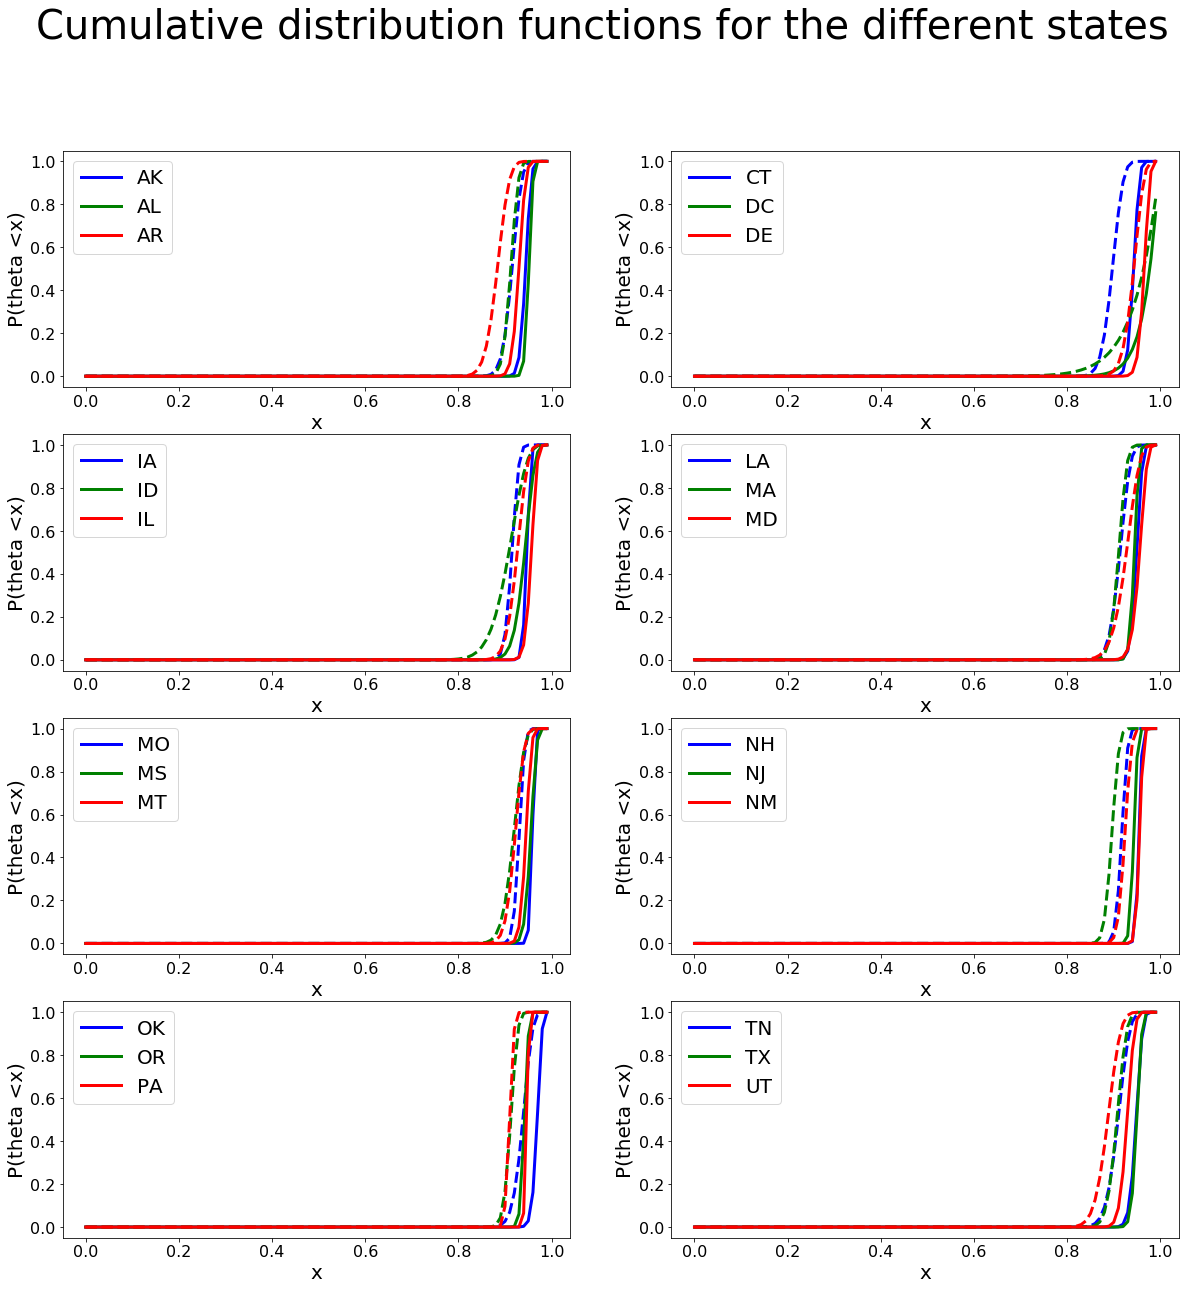

In [369]:
plt.figure(figsize=(20,20))
plt.suptitle('Cumulative distribution functions for the different states', 
             fontsize=40)
values = np.arange(0,1,0.01)
j = np.array([0,3])
for i in range(8):
    j1 = j + i*6
    plt.subplot(4, 2, i+1)
    func_plot(values,list_post[j1[0]:j1[1]])
    
plt.show()